In this notebook we will be using the smtd_preprocessing.py file which is a preprocessing pileline for twitter data to pre-process our tweets and then train our own twitter embeddings. <br>
We can find pre-trained twitter embedding 


In [24]:
import os
import sys
import pandas as pd
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

PATH = "path to repo"
preprocessing_path = PATH+"/practical-nlp/Ch8/O5smtd_preprocessing.py"
sys.path.append(os.path.abspath(preprocessing_path))
import O5_smtd_preprocessing


Let's use the dir() function to find all the properties and methods in the package.

In [25]:
dir(smtd_preprocessing)

['Entity',
 'Punct',
 'PunctChars',
 'TweetTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'deEmojify',
 'demoji',
 'identify_AlphaNumerics',
 'identify_Savings',
 'indentify_Money',
 'indentify_Offers',
 'indentify_Promos',
 'indentify_freebies',
 'neg_lookahead',
 'optional',
 'pos_lookahead',
 'printable',
 'process_BrandMentions',
 'process_BrandName',
 'process_Dates',
 'process_EmailIds',
 'process_HashTags',
 'process_Mentions',
 'process_NonBrandMentions',
 'process_Times',
 'process_TweetText',
 'process_URLs',
 'process_Websites',
 'prune_multple_consecutive_same_char',
 're',
 'regex_or',
 'remove_emoji',
 'remove_spl_words',
 'replace_numbers',
 'string',
 'strip_unicode',
 'strip_whiteSpaces',
 'to_LowerCase',
 'trim']

## Read Data
Let's read the data. Normally in csv files the values are separated by a ','.<br> In this case, it is separated by a ';' so we will specify the delimiter as ';'.

In [26]:
datapath = "/home/etherealenvy/github/practical-nlp/Ch8/Data/sts_gold_tweet.csv"
df = pd.read_csv(datapath,error_bad_lines=False,delimiter=";")

In [27]:
#let's have a loof at the dataset
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [1]:
#pre-process tweets using our package 
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweets = df['tweet'].values

NameError: name 'df' is not defined

## Train Embeddings
Let's train our own embeddings.

In [36]:
#CBOW
import time
start = time.time()
word2vec_tweet = Word2Vec(tweets,min_count=5, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

CBOW Model Training Complete.
Time taken for training is:0.30038 sec 


In [38]:
#Summarize the loaded model
print("Summary of the model:",word2vec_tweet)

#Summarize vocabulary
words = list(word2vec_tweet.wv.vocab)
print("Small part of Vocabulary of our model:",words[:10])

#Acess vector for one word
print("Acess Vector for the word 'lol'",word2vec_tweet['lol'])

Summary of the model: Word2Vec(vocab=774, size=100, alpha=0.025)
Small part of Vocabulary of our model: ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as']
Acess Vector for the word 'lol' [ 0.2756739  -0.03903353  0.12927012  0.20520227  0.04137257 -0.03074632
  0.17001949  0.0449194   0.24886052  0.02291003  0.3795883  -0.05502341
 -0.09399782 -0.00359744  0.07682157 -0.00413511  0.26787597  0.04674146
 -0.22936895 -0.08439928  0.32293504  0.10890193 -0.40296823  0.03652963
 -0.115926   -0.22882248 -0.24653126  0.0714322  -0.08652437  0.03880057
  0.21119894 -0.23348321  0.12913057  0.10799696  0.13972142 -0.21675901
  0.30745262  0.2650789  -0.18451428  0.5429429   0.44019455 -0.0185538
 -0.07647289 -0.24264409  0.05754215  0.2152096  -0.03828681 -0.2931808
 -0.1592866  -0.00597822  0.27122855  0.42071542  0.25826392  0.03933503
  0.05660429 -0.00651797 -0.20876434  0.03676748  0.565065   -0.03702077
 -0.01666446 -0.01691819  0.5507577   0.19740878 -0.2856705

In [40]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE

In [57]:
#Preprocessing our models vocabulary to make better visualizations
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab= list(word2vec_tweet.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words('english')
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/etherealenvy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Size of Vocabulary: 774
Few words in Vocabulary ['the', 'is', 'going', 'to', 'miss', 'this', 'weekend', 'it', 'looks', 'as', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'too', 'bad', 'for', "'", 'fans', '.', 'big', 'no', 'more', 'constantnonbrandmention', 'constantdate', "isn't", 'coming', 'soon', 'enough', 'drinking', 'a', 'mcdonalds', 'coffee', 'and', 'not', 'why', 'someone', 'would', 'me', 'so', 'taylor', 'swift', 'doesnt', 'have', 'twitter', 'i', 'was']
Size of Vocabulary without stopwords: 654
Few words in Vocabulary without stopwords ['going', 'miss', 'weekend', 'looks', 'though', 'getting', 'play', 'w', '/', 'lebron', '..', 'bad', "'", 'fans', '.', 'big', 'constantnonbrandmention', 'constantdate', 'coming', 'soon', 'enough', 'drinking', 'mcdonalds', 'coffee', 'someone', 'would', 'taylor', 'swift', 'doesnt', 'twitter']


In [73]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['weekend','twitter','mcdonalds','coffee']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_tweet.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_tweet[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [74]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 3.21569681e-01 -4.20128219e-02  1.49139896e-01  2.39587322e-01
  5.23119159e-02 -3.82895172e-02  1.98435903e-01  4.76745181e-02
  2.92601347e-01  2.74184775e-02  4.39653128e-01 -6.29316196e-02
 -1.16034716e-01 -4.79452265e-03  9.57187414e-02 -2.61416868e-03
  3.07452261e-01  5.13371602e-02 -2.70336419e-01 -9.65075791e-02
  3.67803395e-01  1.23229615e-01 -4.71419841e-01  4.12440114e-02
 -1.34507343e-01 -2.65210778e-01 -2.89428025e-01  9.18862075e-02
 -1.02691606e-01  5.18364273e-02  2.37800449e-01 -2.76838273e-01
  1.46224156e-01  1.22127891e-01  1.60940975e-01 -2.60926336e-01
  3.56917381e-01  3.06802005e-01 -2.11495727e-01  6.25383675e-01
  5.12356877e-01 -1.54413851e-02 -9.16360319e-02 -2.85034478e-01
  6.27280325e-02  2.50605673e-01 -3.46035771e-02 -3.40862811e-01
 -1.78192899e-01 -4.82304255e-03  3.15962136e-01  4.87821758e-01
  2.91811794e-01  4.30303328e-02  5.91294393e-02 -1.21526523e-02
 -2.37178832e-01  3.23644355e-02  6.59746647e-01 -3.63355316e-02
 -1.7

## Visualization
We will visualize our embeddings using T-SNE. If you do not know aht T-SNE is or have forgotten please refer to Ch3 in the book. We will be using the T-SNE code previously introduced in a notebook from Ch3 which can be found [here](https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/09_Visualizing_Embeddings_Using_TSNE.ipynb).

In [75]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

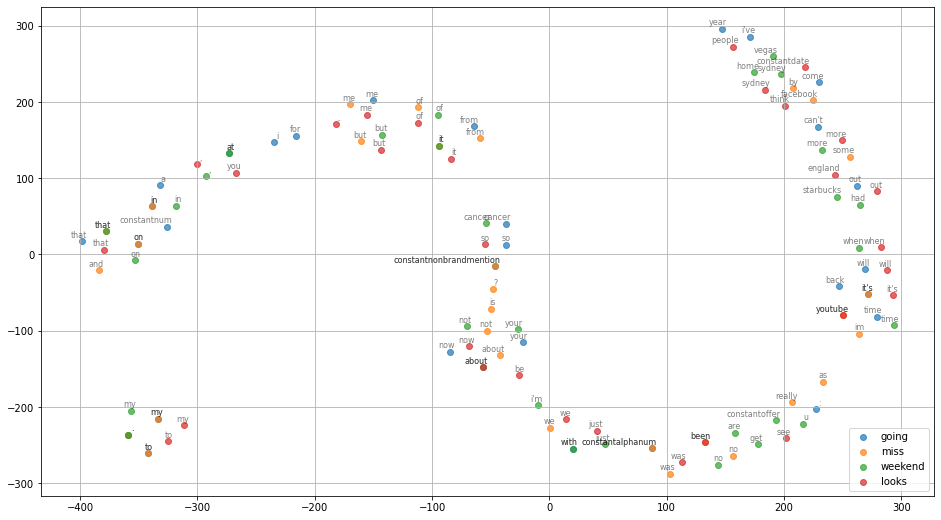

In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)